# 1.0 An end-to-end classification problem (ETL)



## 1.1 Dataset description

The datasets accessed were from **bank-full.csv** ordered by date (from May 2008 to November 2010) with all examples and 17 entries, sorted by date (older version of this dataset with fewer entries).

The input variables are related the data of **bank customers**, related with the **last contact** of the current campaign and attributes related to **campaign previus**.

The classification goal is to predict if the client will **subscribe** (yes/no) a **term deposit** (variable y).

You can download the data from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Adult).

Let's take the following steps:

1. Load Libraries
2. Fetch Data, including EDA
3. Pre-procesing
4. Data Segregation

<center><img width="600" src="https://drive.google.com/uc?export=view&id=1a-nyAPNPiVh-Xb2Pu2t2p-BhSvHJS0pO"></center>

## 1.2 Install and load libraries

In [1]:
!pip install pandas-profiling==3.1.0

     |████████████████████████████████| 261 kB 5.2 MB/s 
     |████████████████████████████████| 3.1 MB 39.7 MB/s 
     |████████████████████████████████| 11.1 MB 42.3 MB/s 
     |████████████████████████████████| 596 kB 7.0 MB/s 
     |████████████████████████████████| 63 kB 848 kB/s 
     |████████████████████████████████| 102 kB 5.1 MB/s 
     |████████████████████████████████| 690 kB 44.9 MB/s 
     |████████████████████████████████| 303 kB 38.1 MB/s 
     |████████████████████████████████| 812 kB 40.2 MB/s 
     |████████████████████████████████| 38.1 MB 7.1 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ab34679bcd9a8efdd5e5edabd623b2aed0686c9aa25dc1a43fec2e4dac6ede36
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=6a13ddbace93566169a183c8eb80dbedd5d3bfe2c7c88b390c7bef00eb617b82
  S

In [2]:
!pip install wandb

     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 181 kB 55.3 MB/s 
     |████████████████████████████████| 145 kB 40.4 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=fdf134a0048c013757fab9711bd9f336bcba2619ac49525b4a18c9738215c5d3
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [3]:
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import tempfile
import os

## 1.3 Exploratory Data Analysis (EDA)

### 1.3.1 Login wandb


In [4]:
# Login to Weights & Biases
!wandb login --relogin

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


### 1.3.2 Download raw_data artifact from Wandb

In [5]:
# save_code tracking all changes of the notebook and sync with Wandb
run = wandb.init(project="decision_tree_bank", save_code=True)

wandb: Currently logged in as: francisvalfgs. Use `wandb login --relogin` to force relogin


In [6]:
# donwload the latest version of artifact raw_data.csv
artifact = run.use_artifact("decision_tree_bank/raw_data.csv:latest")

# create a dataframe from the artifact
df = pd.read_csv(artifact.file())

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### 1.3.3 Pandas Profilling

In [11]:
ProfileReport(df, title="Pandas Profiling Report", explorative=True)

Output hidden; open in https://colab.research.google.com to view.

### 1.3.4 EDA Manually

In [12]:
# There are duplicated rows
df.duplicated().sum()

0

In [13]:
# Delete duplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [14]:
# what the sex column can help us?
pd.crosstab(df.y,df.housing,margins=True,normalize=False)

housing,no,yes,All
y,,,
no,16727,23195,39922
yes,3354,1935,5289
All,20081,25130,45211


In [15]:
# y vs [marital & contact]?
pd.crosstab(df.y,[df.marital,df.contact],margins=True)

marital divorced                    married                     single  \
contact cellular telephone unknown cellular telephone unknown cellular   
y                                                                        
no          2840       221    1524    14938      1756    7765     7138   
yes          486        50      86     2230       259     266     1653   
All         3326       271    1610    17168      2015    8031     8791   

marital                      All  
contact telephone unknown         
y                                 
no            539    3201  39922  
yes            81     178   5289  
All           620    3379  45211

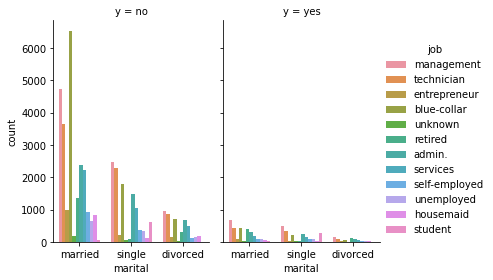

In [16]:
%matplotlib inline

sns.catplot(x="marital", 
            hue="job", 
            col="y",
            data=df, kind="count",
            height=4, aspect=.7)
plt.show()

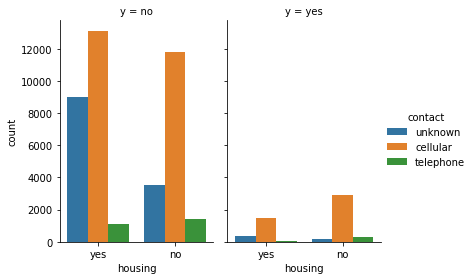

In [17]:
g = sns.catplot(x="housing", 
                hue="contact", 
                col="y",
                data=df, kind="count",
                height=4, aspect=.7)

g.savefig("bank_housing_contact.png", dpi=100)

run.log(
        {
            "bank_housing_contact": wandb.Image("bank_housing_contact.png")
        }
    )

In [18]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
run.finish()